# Visualization of Sweep Results

## Per-Run Scatter Plots

Validation Accuracy vs. Validation AUC:

Each dot represents a run.

- Shallow CNN is tightly clustered with high accuracy/AUC.

- Regularized models show a broader spread, highlighting the importance of hyperparameter selection for best performance.

Validation Loss vs. Validation AUC:

Lower loss is generally associated with higher AUC for the best runs, particularly in models with dropout and augmentation.

Validation Precision vs. Validation AUC:

Plots show how precision varies with AUC across configurations.

Color Coding:

In configurations using dropout, points can be colored by dropout rate to visualize any trends or clusters (no simple linear trend observed, but optimal dropout values often cluster with best runs).

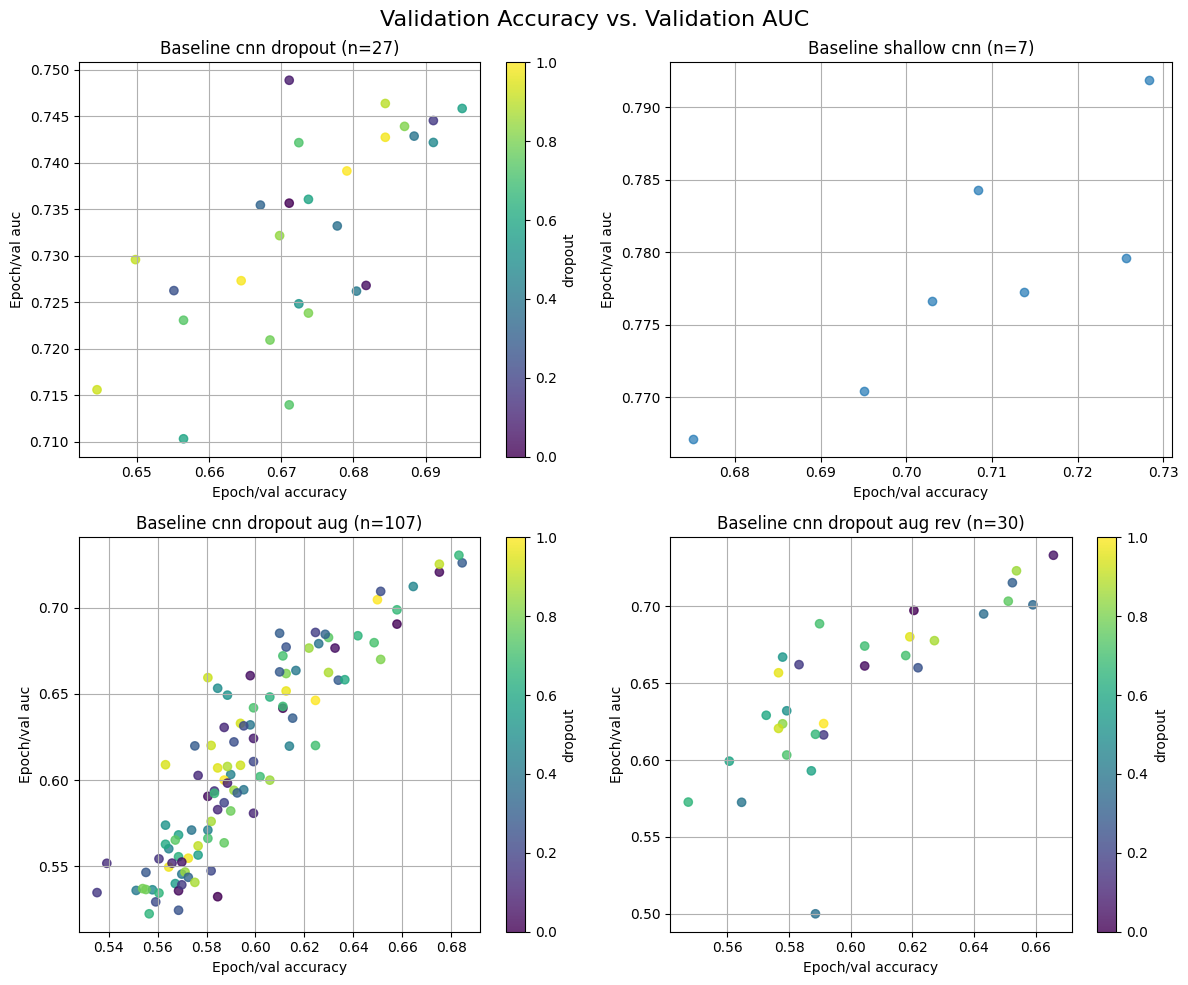

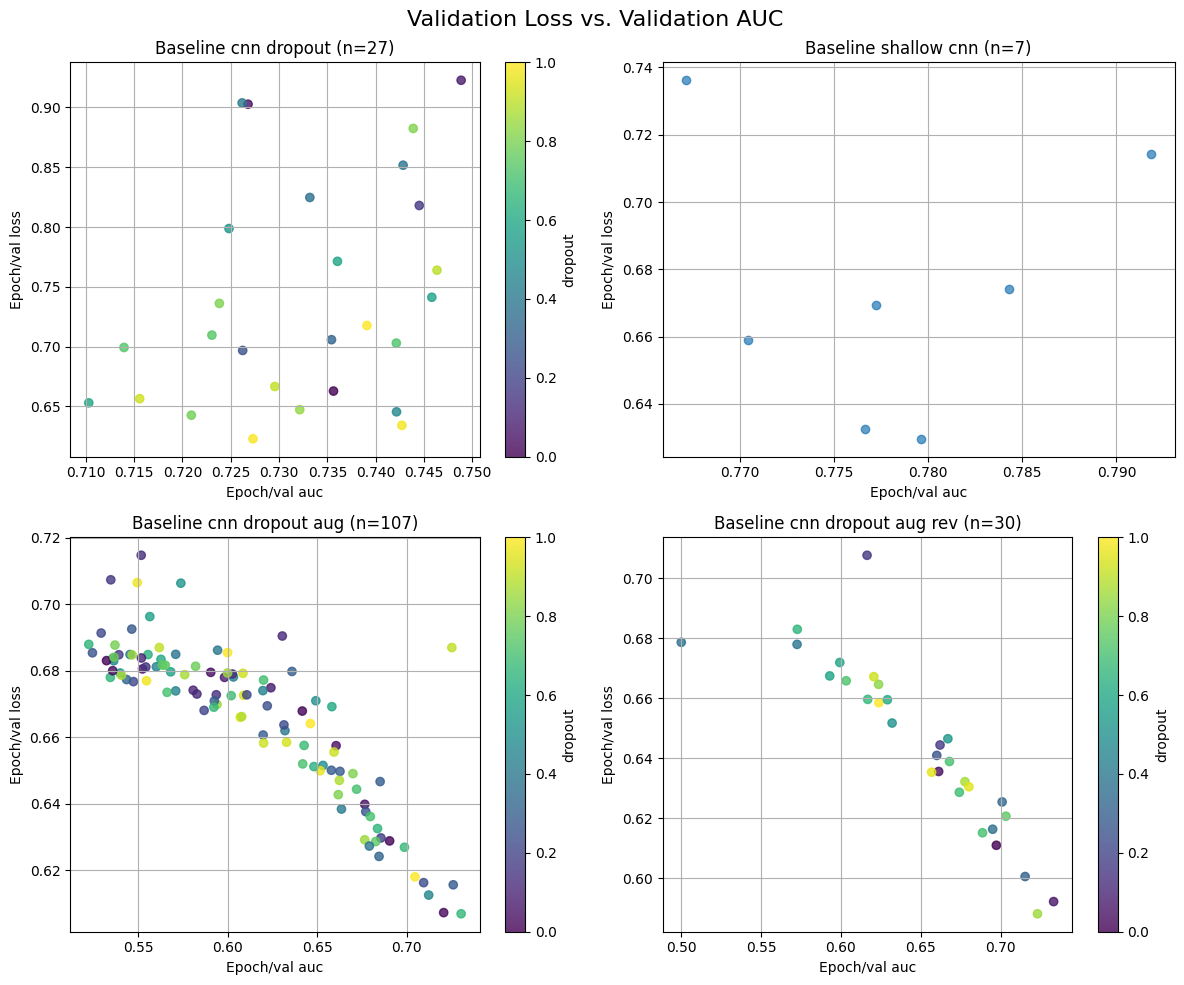

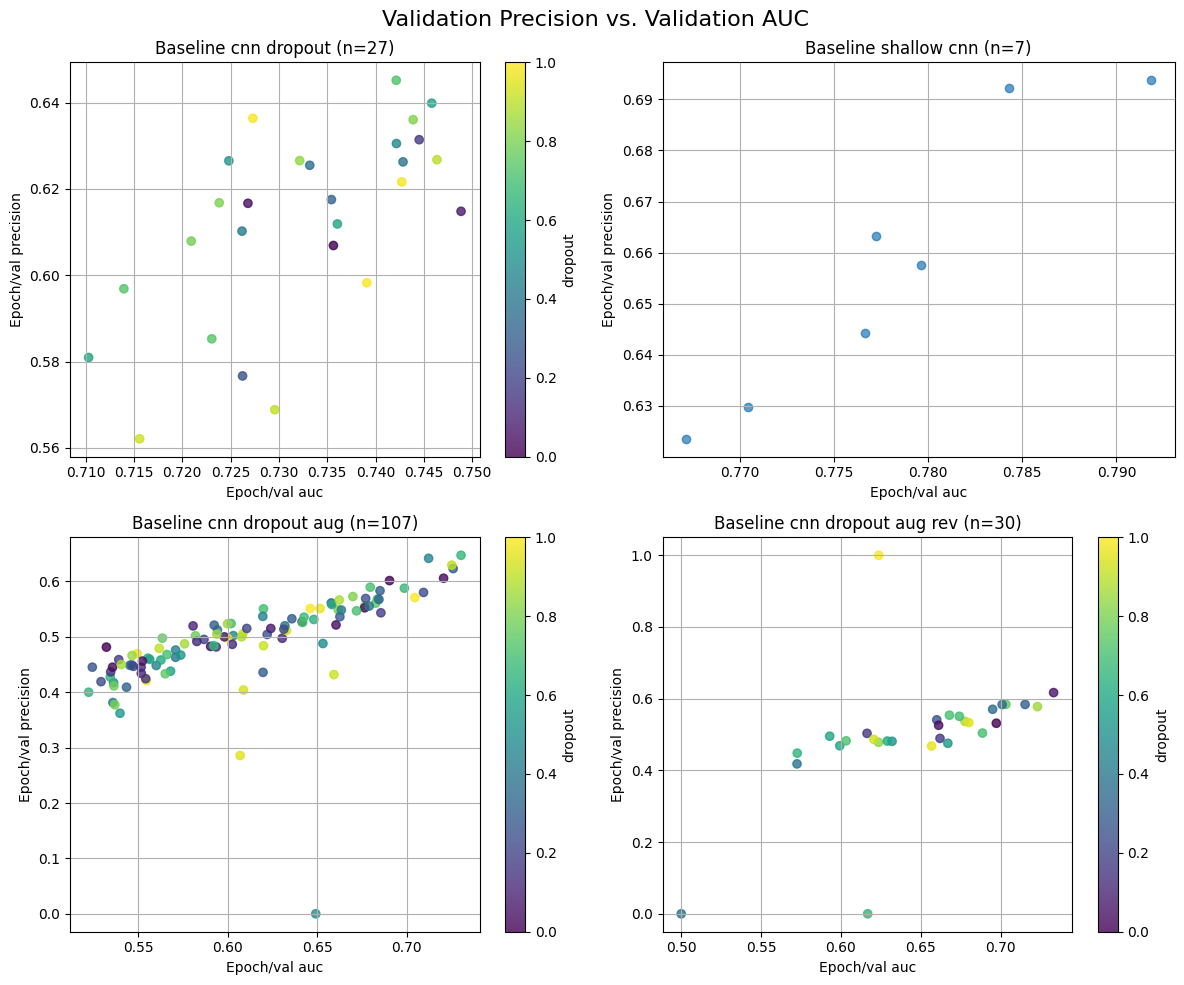

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Load CSV log files
csv_files = glob.glob("logs/*.csv")
dfs = {os.path.splitext(os.path.basename(f))[0]: pd.read_csv(f) for f in csv_files}


# Plotting function
def per_run_scatter(dfs, x_col, y_col, color_col=None, suptitle=None):
    n = len(dfs)
    ncols = 2
    nrows = (n + 1) // 2
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 5), squeeze=False)
    cmap = plt.cm.viridis

    for ax, (name, df) in zip(axes.flat, dfs.items()):
        if color_col and color_col in df.columns:
            normed = (df[color_col] - df[color_col].min()) / (df[color_col].max() - df[color_col].min())
            sc = ax.scatter(df[x_col], df[y_col], c=cmap(normed), alpha=0.8)
            plt.colorbar(sc, ax=ax, label=color_col)
        else:
            sc = ax.scatter(df[x_col], df[y_col], alpha=0.7)
        ax.set_title(f"{name.replace('_', ' ').capitalize()} (n={len(df)})")
        ax.set_xlabel(x_col.replace('_', ' ').capitalize())
        ax.set_ylabel(y_col.replace('_', ' ').capitalize())
        ax.grid(True)
    # Hide any empty axes
    for i in range(n, nrows * ncols):
        fig.delaxes(axes.flat[i])
    if suptitle:
        fig.suptitle(suptitle, fontsize=16)
    plt.tight_layout()
    plt.show()


# Run all desired plots
per_run_scatter(dfs, x_col="epoch/val_accuracy", y_col="epoch/val_auc", color_col="dropout",
                suptitle="Validation Accuracy vs. Validation AUC")

per_run_scatter(dfs, x_col="epoch/val_auc", y_col="epoch/val_loss", color_col="dropout",
                suptitle="Validation Loss vs. Validation AUC")

per_run_scatter(dfs, x_col="epoch/val_auc", y_col="epoch/val_precision", color_col="dropout",
                suptitle="Validation Precision vs. Validation AUC")
